In [29]:
# Our Full Code

import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# Dense Layer
class Layer_Dense:

    # Layer init
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation function
class Activation_ReLU:

    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

# Softmax Activation Function
class Activation_Softmax:

    def forward(self, inputs):
        expo_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        norm_values = expo_values / np.sum(expo_values, axis=1, keepdims=True)
        self.output = norm_values

# Common Loss
class Loss:

    # output => model's prediction
    # y => ground truth
    def calculate(self, output, y):
        # forward method is of specific loss function eg. Cross Entropy
        sample_losses = self.forward(output, y)
        
        data_loss = np.mean(sample_losses)

        return data_loss


# Cross Entropy Loss:
class Loss_Categorical_Cross_Entropy(Loss):
    
    def forward(self, y_pred, y_true):
        
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # check if y_true is sparse or one-hot-coded
        if len(y_true.shape) == 1:
            correct_confidence = y_pred_clipped[range(len(y_pred_clipped)), y_true]
        else:
            correct_confidence = np.sum(y_pred_clipped * y_true, axis=1)

        # Losses
        neg_log = -np.log(correct_confidence)
        return neg_log


X, y = spiral_data(samples=100, classes=3)

# Initialization
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

loss_function = Loss_Categorical_Cross_Entropy()

# Forward pass
dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

loss = loss_function.calculate(activation2.output, y)
print("Avg Loss: ", loss)


# Accuracy
# outputs the index from softmax_output
predictions = np.argmax(activation2.output, axis=1)

if len(y.shape) == 2:
    y = np.argmax(y, axis=2)

accuracy = np.mean(predictions == y)

# True evaluates to 1; False to 0
print("Accuracy: ", accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
Avg Loss:  1.0986104
Accuracy:  0.34


# Chapter-7 : Derivatives

In [30]:
# We saw in Chapter:6 that depending upon 'luck' to increase the accuracy might,
# not be an efficient way to move further. Instead we need something smart enough 
# to train out model. The concepts that we will be using in future contains 
# partial derivations. 

# If we observe the Loss Function carefully, biases and weights do not directly,
# Imapact the loss function, but the loss function is dependent upon the 
# model's output value and this output value is dependent on the weights and biases.
# So, indirectly we see that loss_function is dependent upon weights and biases.


[0 1 2 3 4]
[0 2 4 6 8]


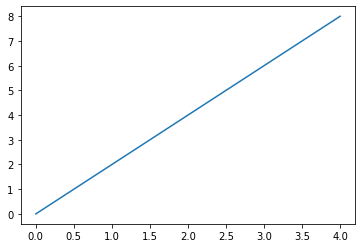

Slope of this linear line:  2.0


In [31]:
# To calculate this "impact" we use SLOPE of the linear function.
# Slope of a linear function is easy, it is the difference in the
# y values, divided by the difference in x values.

# Let us understand slope briefly.

import matplotlib.pyplot as plt
import numpy as np

# Slope of linear equation: y=2x
def f(x):
    return 2*x

x = np.array(range(5))
y = f(x)

print(x)
print(y)

plt.plot(x, y)
plt.show()

# Now we have to define the "impact" of x has on the overall function,
# We can define this by calculating the "Slope" of the line, since it is the "Rise over Run".

print("Slope of this linear line: ", (y[1]-y[0]) / (x[1]-x[0]))

# We can take any two differnt points in the line and the slope will be the same
# since it is a linear equation.


#### Numerical Derivative

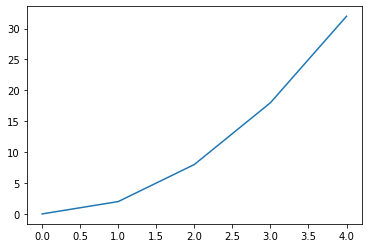

Slope (1): 1
Slope (2): 9


In [32]:
# Calculating slope of a non-linear line is a bit tricky.
# Since, any two points on the curve different and gives different slope values.
# For example, how can we define slope of the curve: f(x) = 2(x^2)

import matplotlib.pyplot as plt
import numpy as np

# Curve equation


def f(x):
    return 2*x**2


x = np.array(list(range(5)))
y = f(x)

plt.plot(x, y)
plt.show()

print(f"Slope (1): {(y[1]-y[0])-(x[1]-x[0])}")
print(f"Slope (2): {(y[3]-y[2])-(x[3]-x[2])}")


<img src="./tangentSlope.png" height="400">

In [33]:
# Q: What should we do in this case?
# A: Calculus proposes that we measure the slope of the tangent line at x (for a specific input value to the function),
#    giving us the instantaneous slope (slope at this point), which is the derivative.
#    The tangent line is created by drawing a line between two points that are “infinitely close” on a curve.


def f(x):
    return 2*x**2


delta = 0.0001

x1 = 1
x2 = x1 + delta

y1 = f(x1)
y2 = f(x2)

slope_at_point = (y2-y1)/(x2-x1)
print("Instantaneous Slope: ", slope_at_point)


Instantaneous Slope:  4.0001999999987845


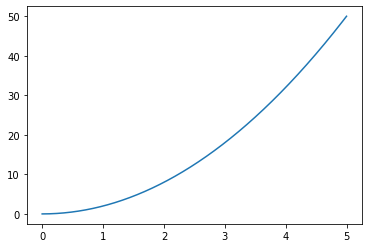

In [34]:
# Let's see how different tangent lines appear on different points.

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x**2

# This will increment the values in a granular fashion.
x = np.arange(0, 5, 0.001)
y = f(x)

plt.plot(x, y)
plt.show()


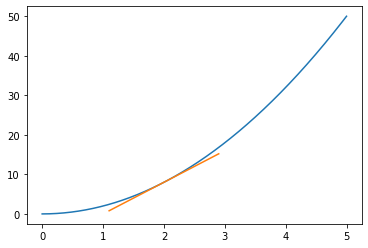

First points - (x1, y1) : (2, 8)
Second points - (x2, y2) : (2.0001, 8.000800020000002)


In [35]:
# Full code : to view the tangential line at one point

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x**2

x = np.arange(0, 5, 0.001)
y = f(x)

plt.plot(x, y)

# Two, "very close" points
delta_value = 0.0001
x1 = 2
x2 = x1 + delta_value

y1 = f(x1)
y2 = f(x2)

# General Linear equation: y = mx + c
# Here we know y, m and x but c (y-intercept) is unknown.
# Rearranging variables, we get, c = y - mx
# Therefore,

# slope between two very close points,
slope = (y2-y1) / (x2-x1)
c = y2 - slope * x2

# y = mx + c
def tangent_line(x):
    return slope*x + c

plot_tangent_x = [x1-0.9, x1, x1+0.9]
plot_tangent_y = [tangent_line(i) for i in plot_tangent_x]
plt.plot(plot_tangent_x, plot_tangent_y)
plt.show()

print(f"First points - (x1, y1) : ({x1}, {y1})")
print(f"Second points - (x2, y2) : ({x2}, {y2})")


The orange line above defines the "slope" of the curve at point x=2.
<br/>
Now why is this imporant? 
<br/>
"We care about the slope of the tangent line because it informs us 
<br/>
about the impact that x has on this function at a particular point, 
<br/>
referred to as the instantaneous rate of change."

We will use this concept to determine the effect
<br/>
of a specific weight or bias on the overall loss function given a sample.

(x1, y1): (0, 0)
(x2, y2): (0.0001, 2e-08)

(x1, y1): (1, 2)
(x2, y2): (1.0001, 2.00040002)

(x1, y1): (2, 8)
(x2, y2): (2.0001, 8.000800020000002)

(x1, y1): (3, 18)
(x2, y2): (3.0001, 18.001200020000002)

(x1, y1): (4, 32)
(x2, y2): (4.0001, 32.00160002)



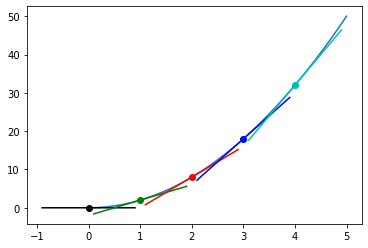

In [36]:
# Code to visualize tangent lines at different points of curve.

import matplotlib.pyplot as plt
import numpy as np


def f(x):
    return 2*x**2


x = np.array(np.arange(0, 5, 0.0001))
y = f(x)

plt.plot(x, y)

colors = ["k", "g", "r", "b", "c"]

# y = mx + c


def approx_tangent_line(x, slope, c):
    return (slope*x) + c


for i in range(5):
    delta = 0.0001
    x1 = i
    x2 = x1 + delta

    y1 = f(x1)
    y2 = f(x2)

    print(f"(x1, y1): ({x1}, {y1})")
    print(f"(x2, y2): ({x2}, {y2})\n")

    # slope
    m = (y2-y1)/(x2-x1)
    # y-intercept => c = y - mx
    c = y2-(m*x2)

    plot_tangent_x = [x1-0.9, x1, x1+0.9]
    plot_tangent_y = [approx_tangent_line(i, m, c) for i in plot_tangent_x]

    plt.scatter(x1, y1, c=colors[i])
    plt.plot(plot_tangent_x, plot_tangent_y, c=colors[i])

plt.show()


### Analytical Derivative

In [37]:
# To compute the derivative of functions using the analytical method, we can split them into simple,
# elemental functions, finding the derivatives of those and then applying the chain rule